In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score
#%matplotlib qt

In [2]:
model_file = r"F:\moseq\2021-01-15_Meloxicam\2022-07-18_moseq\models\rOT_model_1000-15.p"
index_file = r"F:\moseq\2021-01-15_Meloxicam\2022-07-18_moseq\moseq2-index.role.yaml"

max_syllable = 70

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
palette = sns.color_palette('deep', n_colors=len(groups))
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]



exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=70, groups=groups)

pruned 2375 transitions which are never used


Best value for parameter "shrinkage" is auto, achieving a mean accuracy of ~46.8% ± 8.17% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
                               precision    recall  f1-score   support

              14d carrageenan       0.00      0.00      0.00         3
            24hrs carrageenan       0.50      0.67      0.57         3
24hrs carrageenan + meloxicam       0.00      0.00      0.00         3
   24hrs carrageenan + saline       0.00      0.00      0.00         3
             4hrs carrageenan       0.44      0.44      0.44         9
               6d carrageenan       0.00      0.00      0.00         3
                     baseline       0.77      0.83      0.80        12

                     accuracy                           0.44        36
                    macro avg       0.24      0.28      0.26      

c:\Users\Josh\anaconda3\envs\moseq2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


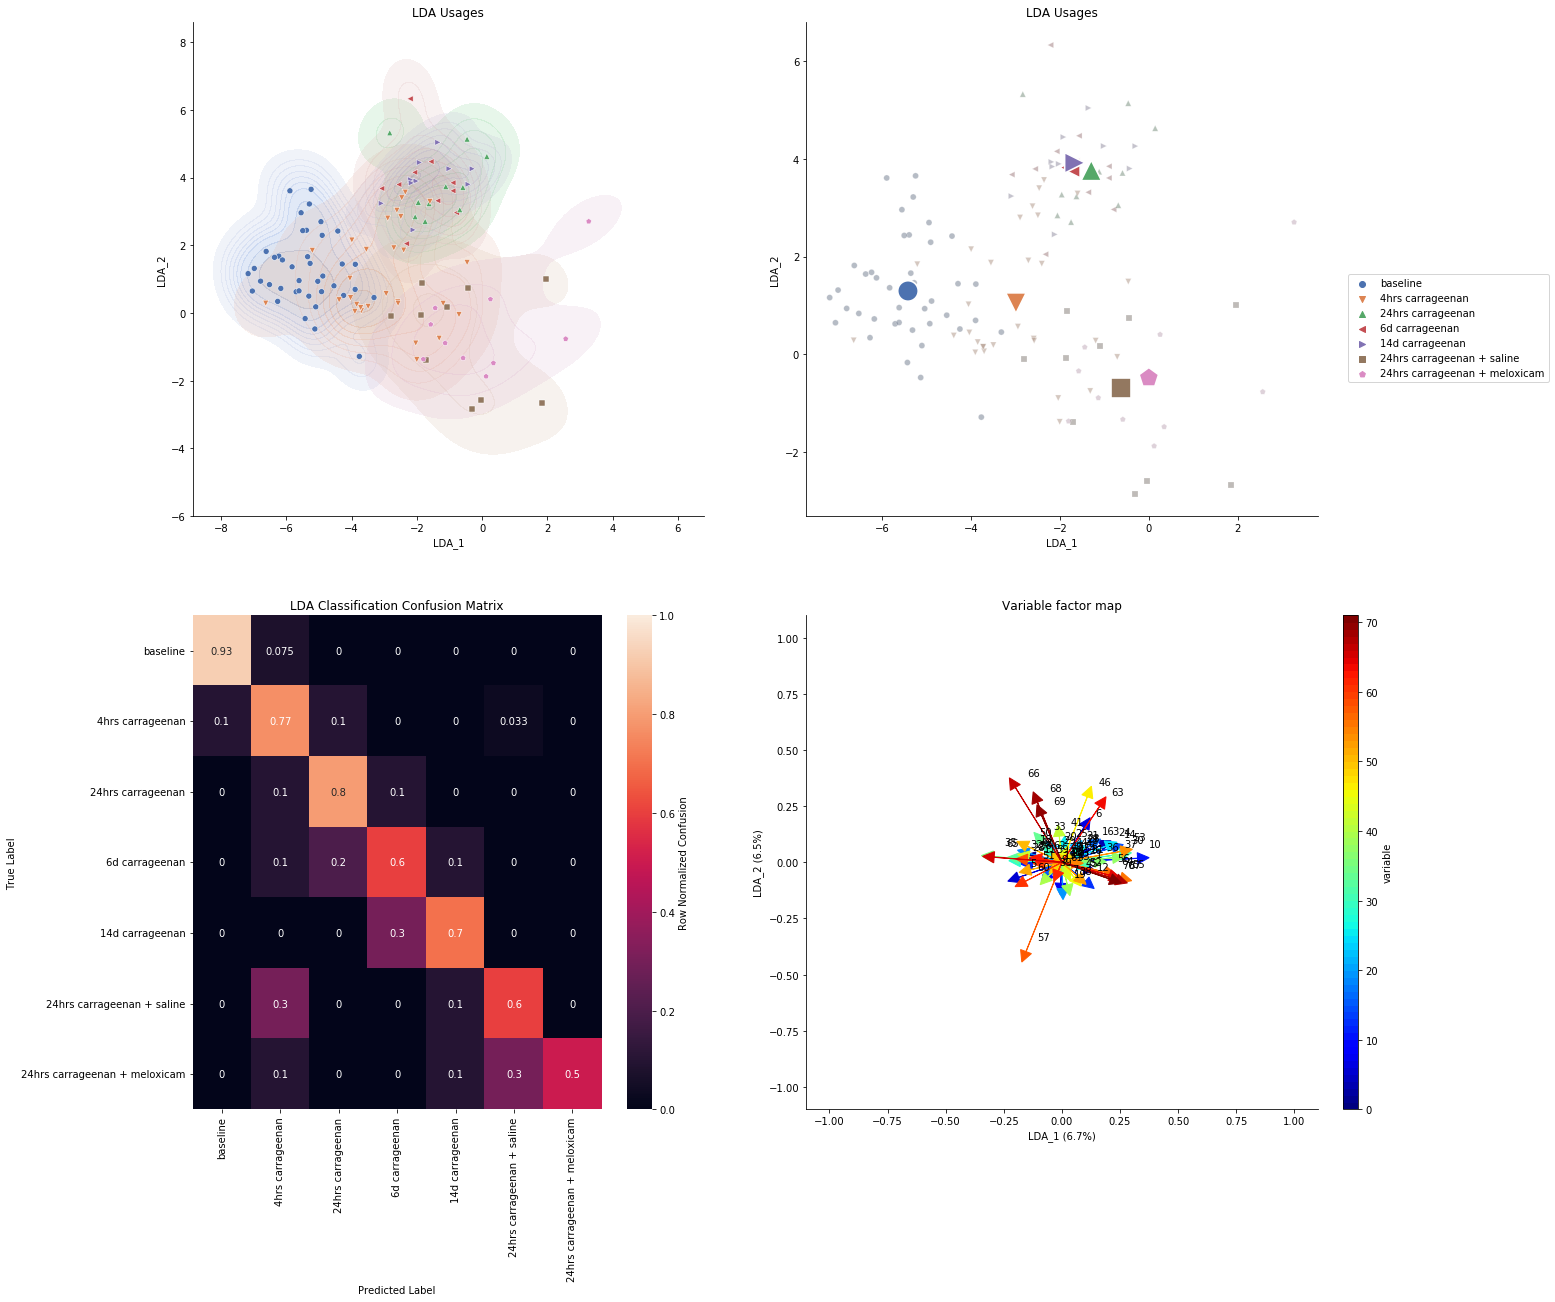

In [4]:
results = train_lda_pipeline(representations, 'usage')

fig, axs, df = plot_lda_results(results.estimator, representations.usage, representations.meta, representations.groups, groups, palette, markers, title='LDA Usages')

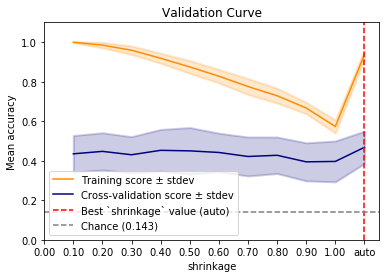

In [5]:
plot_validation_curve(results.cv_result)

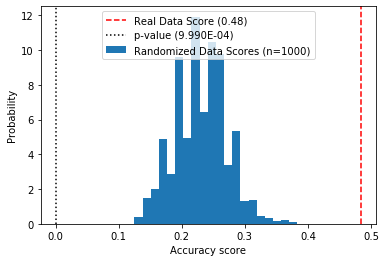

In [6]:
plot_permutation_score(results.estimator, results.data.usage, results.data.groups)